### О задании

Задание состоит из последовательных вопросов (отвечать на них обязательно, код и графики без интерпретации не имеют никакого смысла, иначе - снижение баллов), посвященных работе с табличными данными, но на более низком уровне с помощью Numpy

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

***DeadLine - 08.11.2024 23:59***


## Инструкция по сдаче ДЗ.



0. Просмотр лекции обязателен. Не потому что без этого невозможно выполнить домашнее задание, а потому что с этим выполнение домашнего задания станет комфортным, приятным и быстрым. Вы потратите намного меньше времени для изучения материала и понимания того, что от Вас хотят, нежели сразу приступите к выполнению домашнего задания без просмотра лекции.

1. Скопируйте к себе колаб-ноутбук.

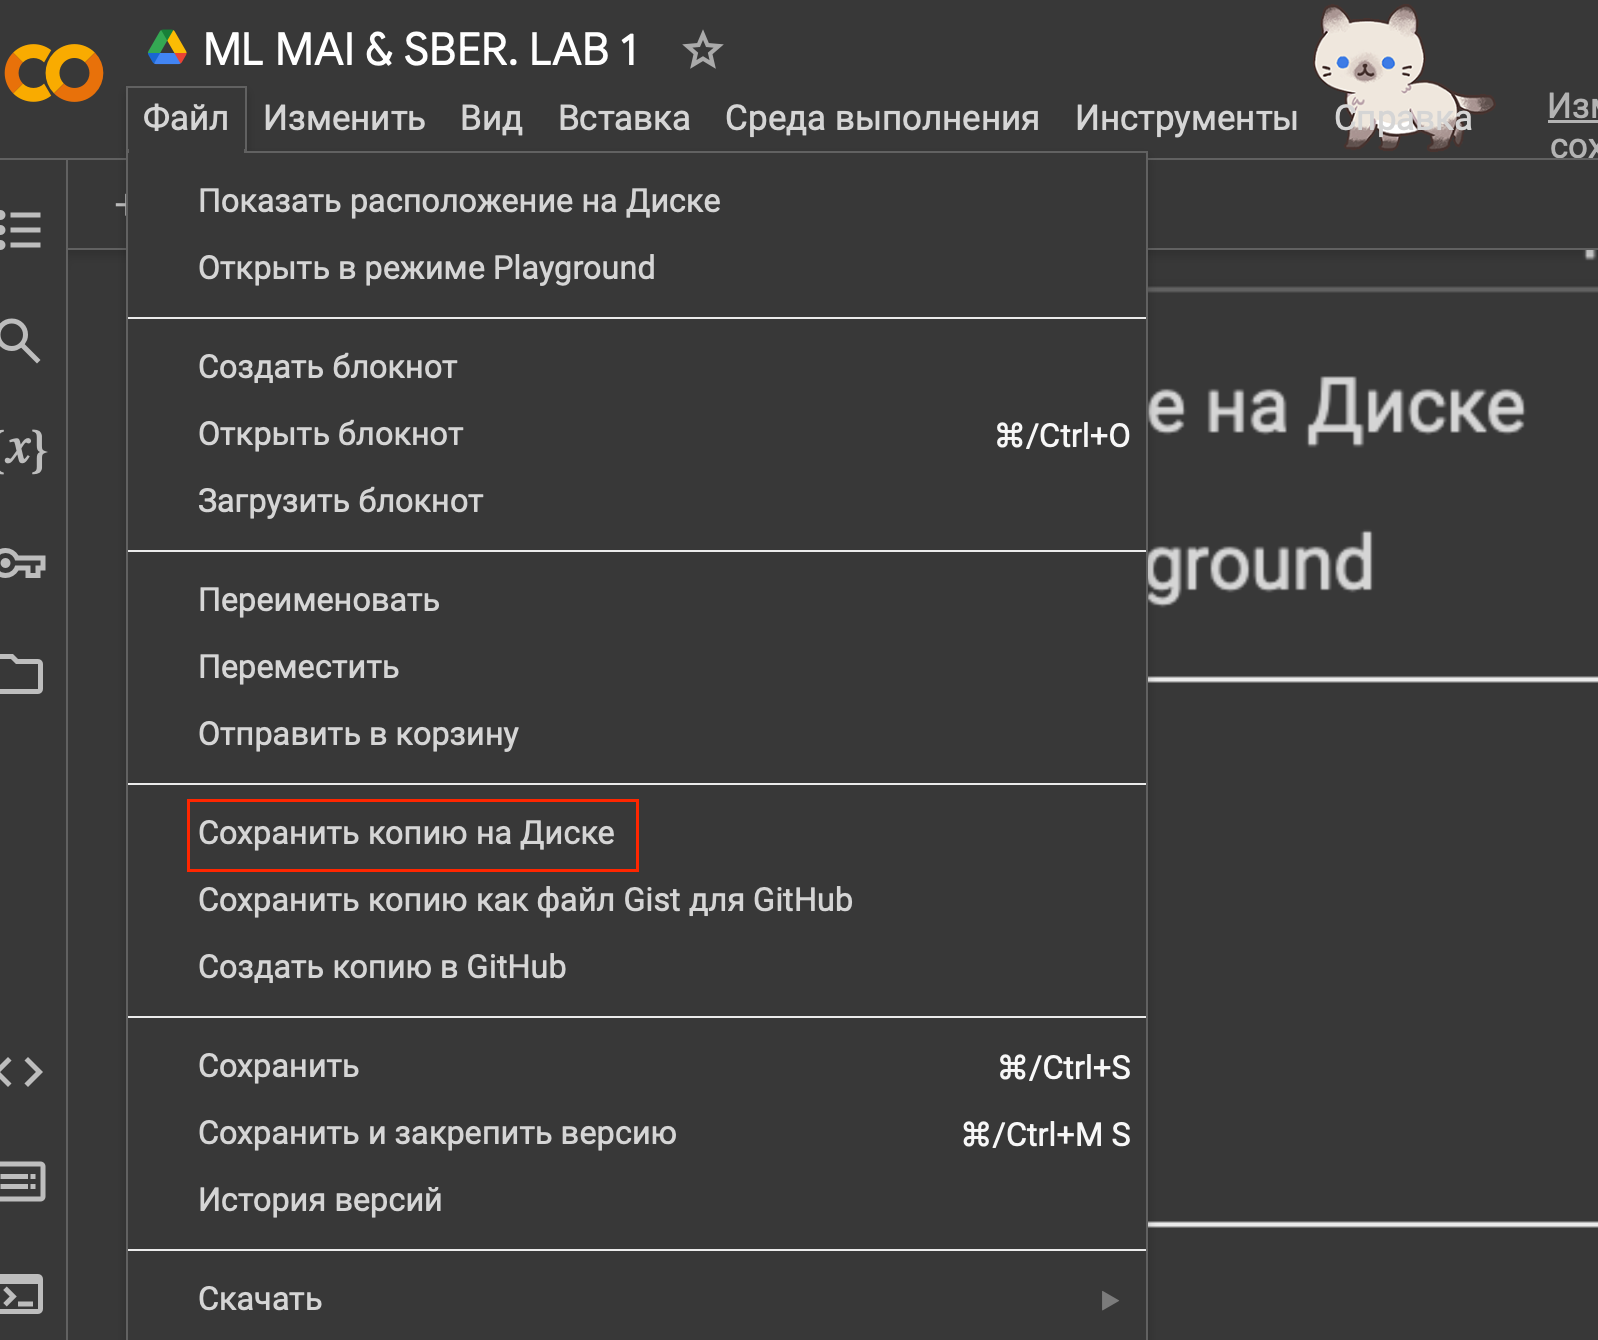

2. у Вас откроется файл в новой вкладке с названием "Копия...". После описания задания вы пишите решение этого задания.

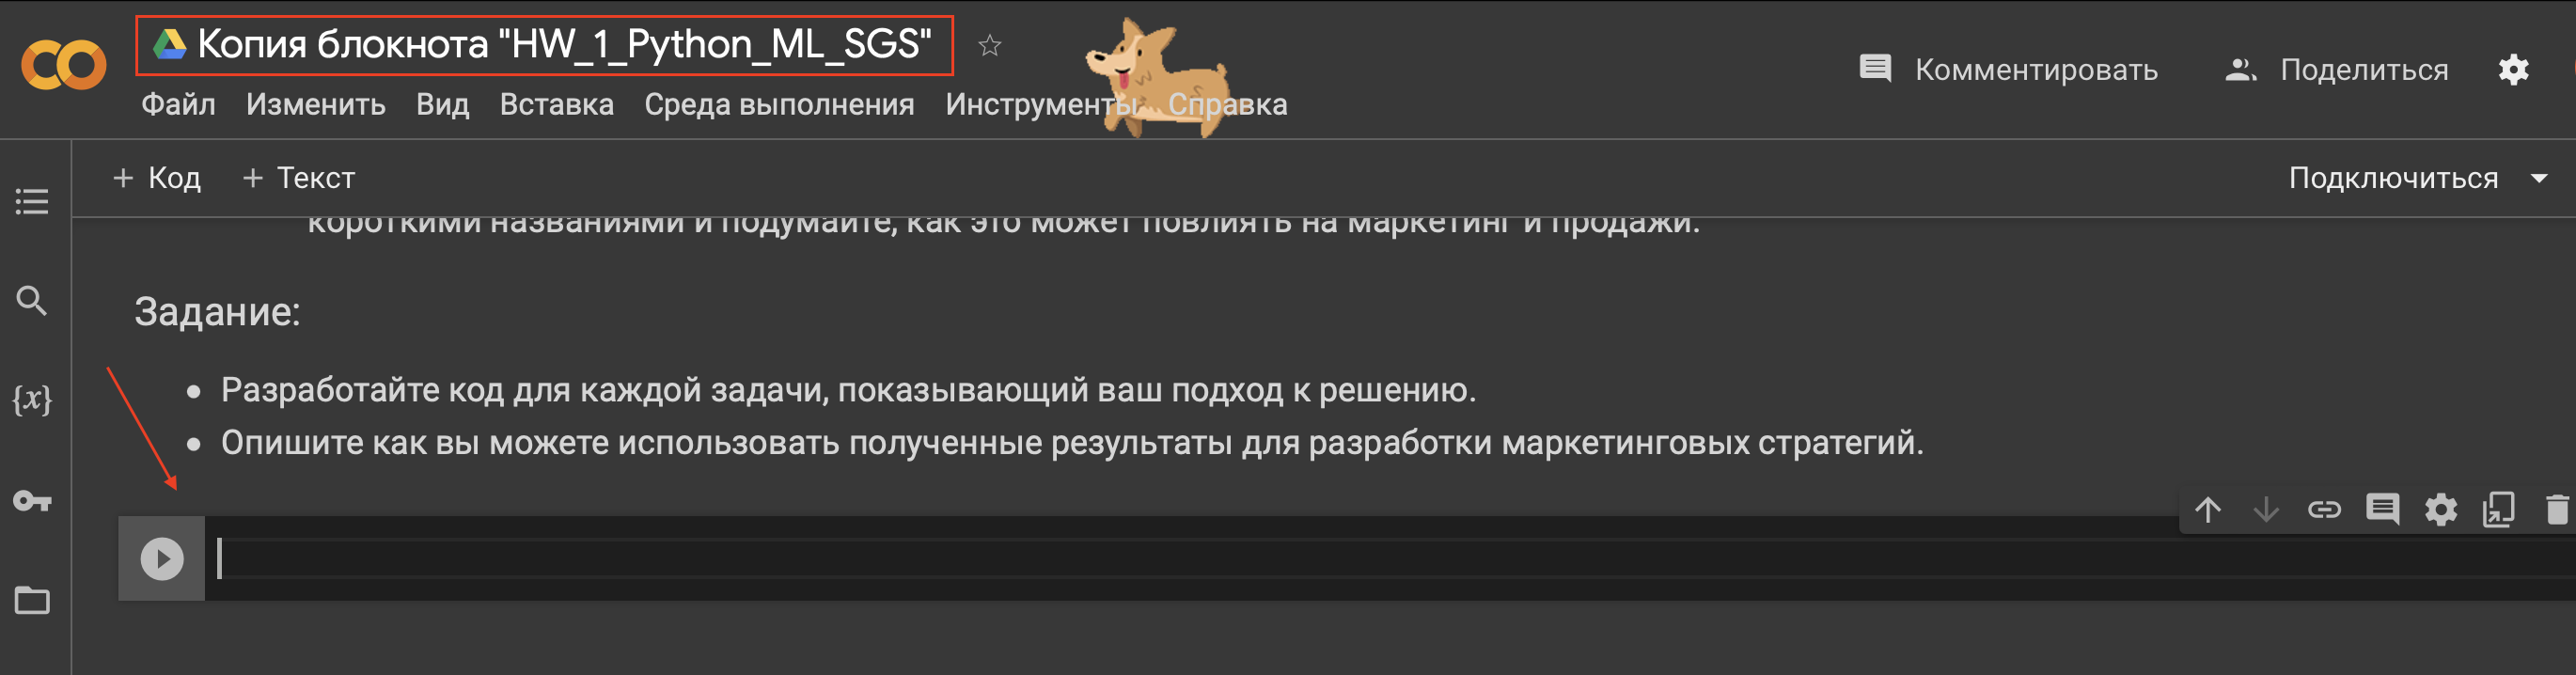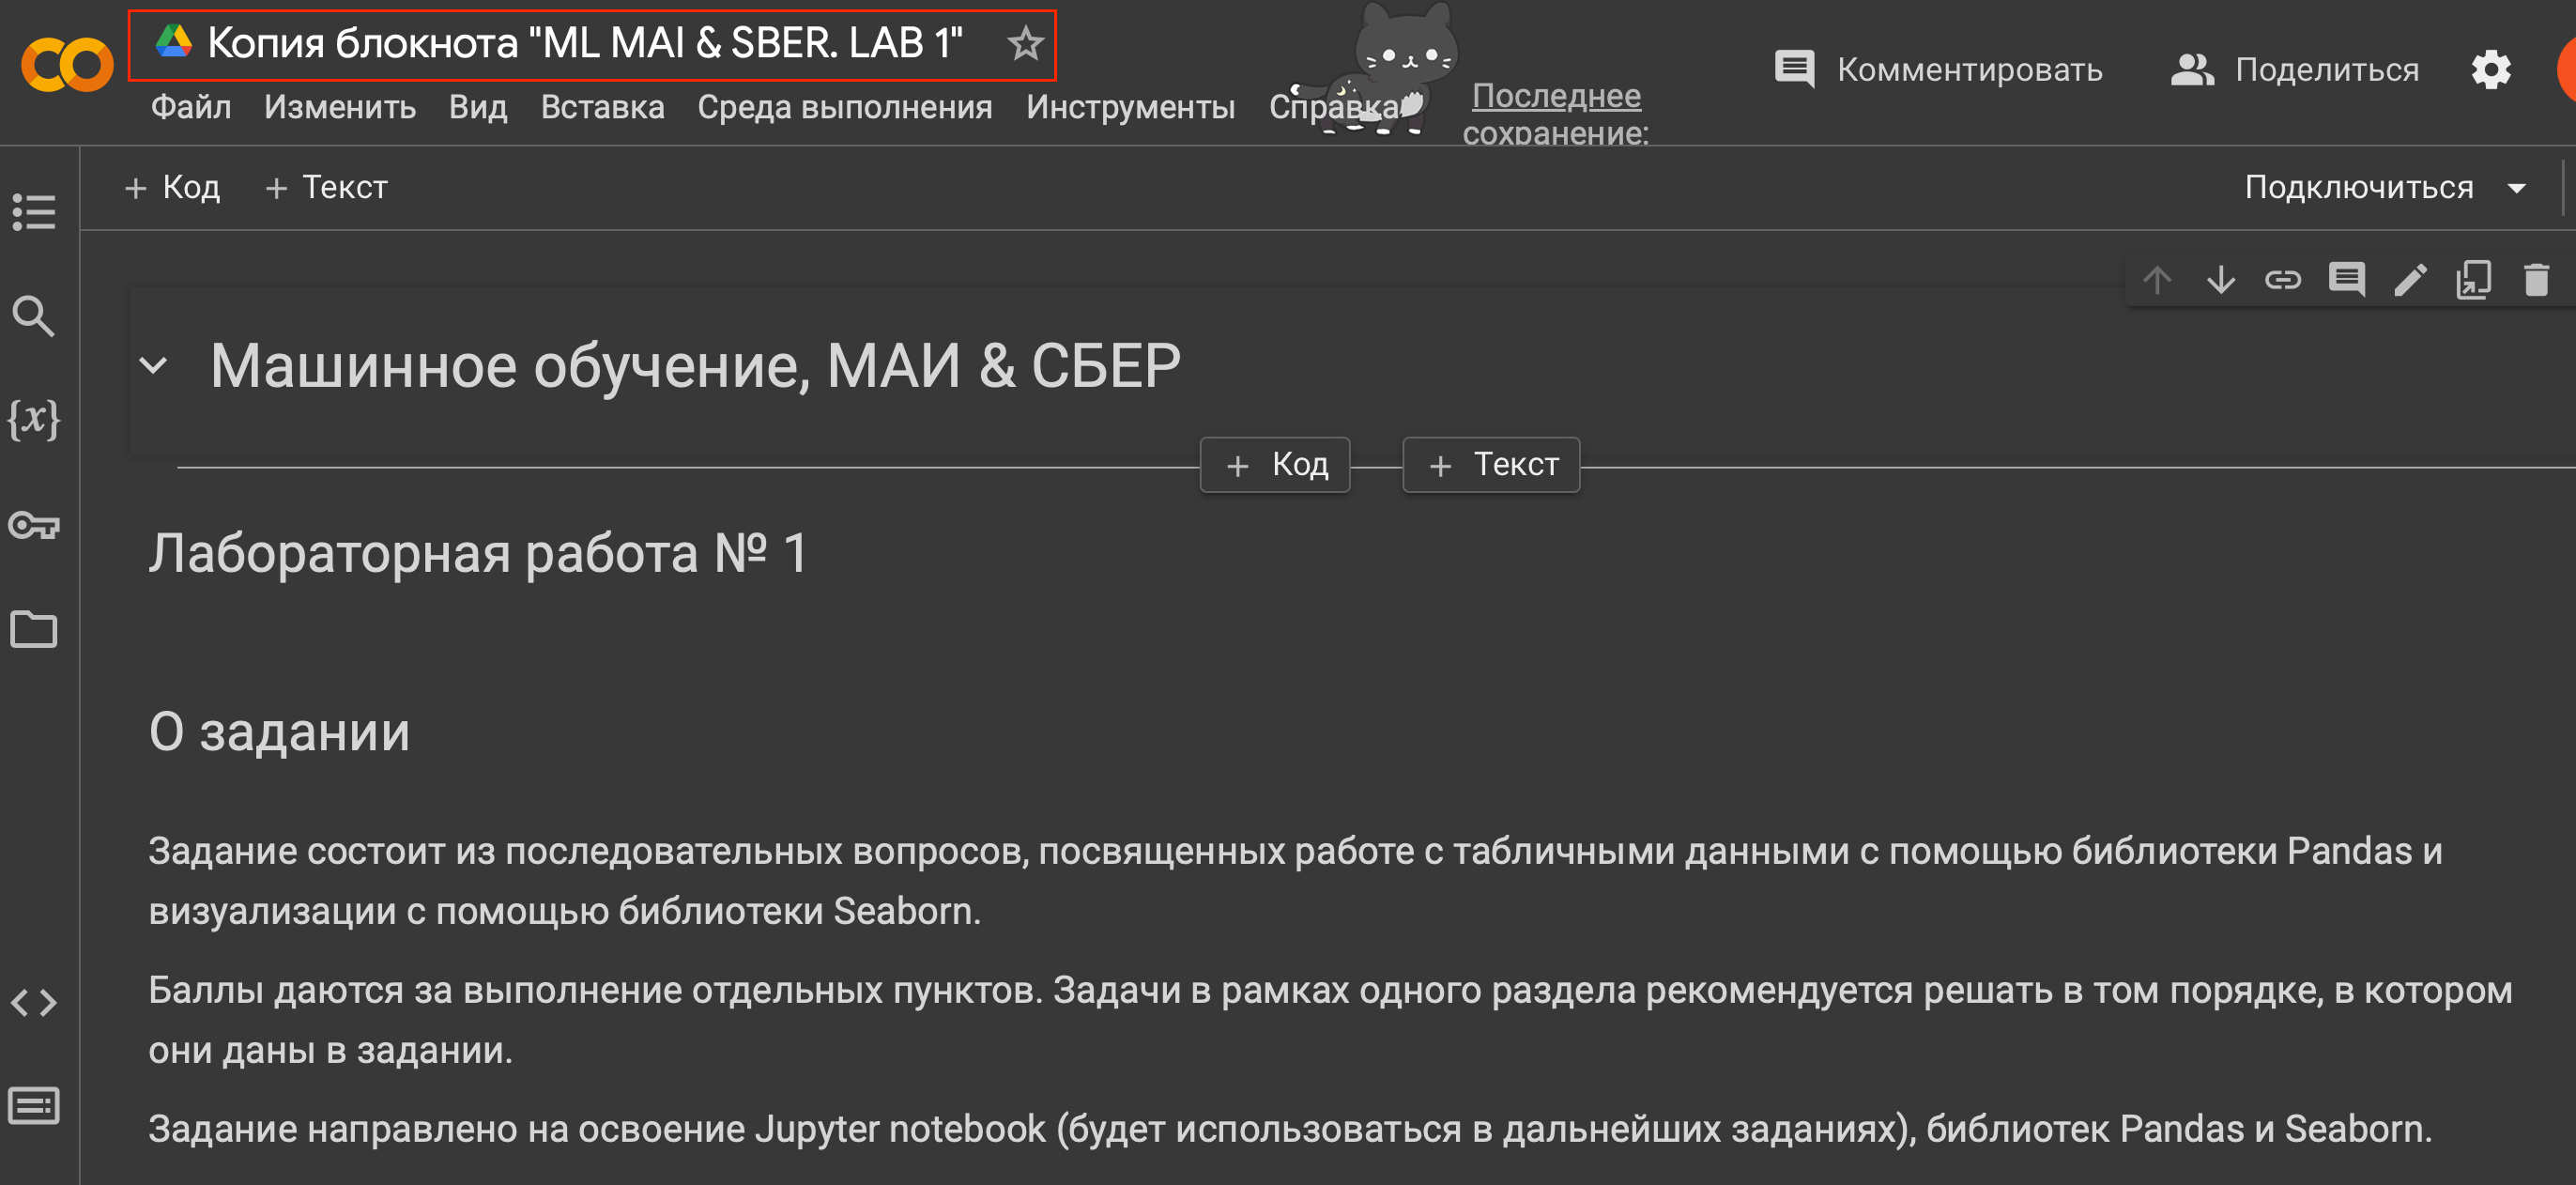

3. После выполнения домашнего задания нажмите кнопку "поделиться" и перейдите в режим доступно всем по ссылке

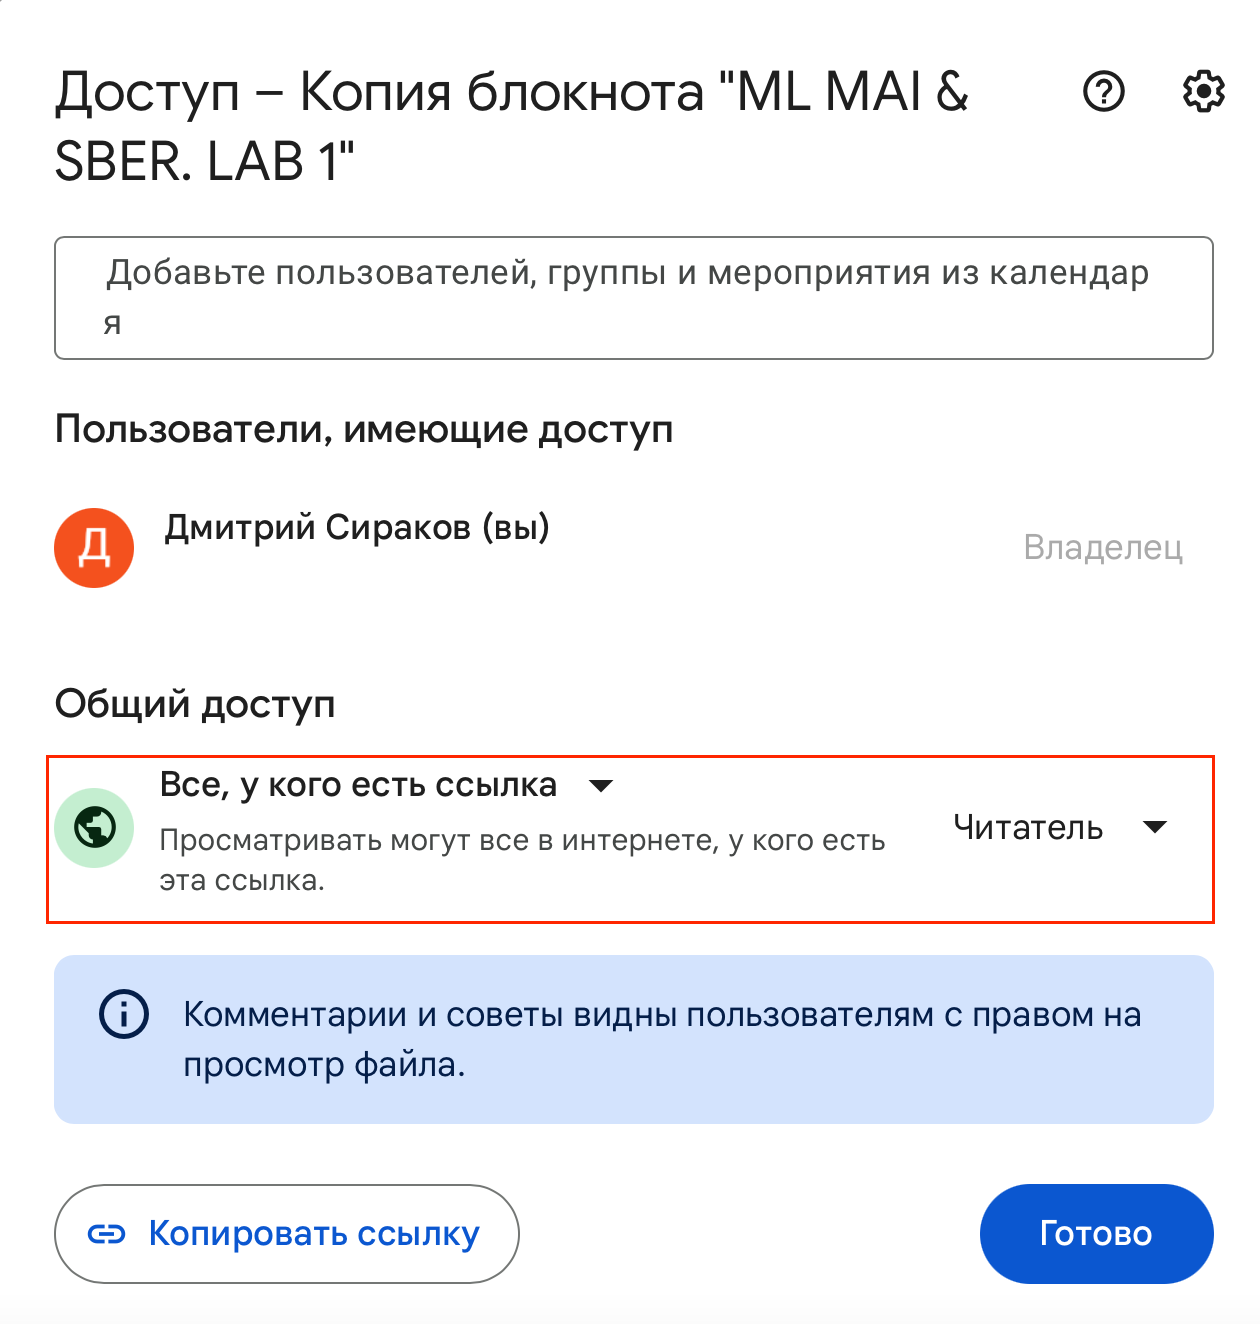

4. Загрузите эту ссылку в lms.mai.ru по курсу "Машинное обучение" в качестве ссылки в раздел "Pandas - работа с таблицами для машинного обучения (ЛР) [17.02]"


В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [242]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=11)
m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

# Задание

## Часть 0. Подготовка [+0.5 балла]

**Задание 1 [+0.5 балла]**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
!pip install zipfile36

In [271]:
import zipfile
 
df = pd.read_csv('train.zip', compression='zip')
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

В колонке `dropoff_datetime` содержится информация о времени окончания поездки, однако эта колонка присутствует только в обучающей выборке и отсутствует в тестовой. Это создаёт проблему, так как при обучении модели мы не сможем использовать эту колонку для предсказаний на новых данных. В связи с этим, чтобы избежать ошибок и упростить анализ, рекомендуется удалить колонку `dropoff_datetime` из датасета.

Колонка `pickup_datetime` содержит дату и время начала поездки в формате строки, что затрудняет выполнение операций с датами и временем, таких как вычисление продолжительности поездки или анализ зависимости цены от времени суток. Преобразование этих данных в `datetime`-объекты позволит использовать методы для работы с датой (вместо огромного количества строк для решения какой-нибудь маленькой подзадачи будет использоваться один вызов метода)

In [272]:
df = df.drop('dropoff_datetime', axis=1)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` содержится значение, которое мы стремимся предсказать. Давайте изучим распределение целевой переменной в обучающем наборе данных. Для этого построим гистограмму этой переменной.

Построение гистограммы целевой переменной важно по нескольким причинам:

1. **Понимание распределения**: Гистограмма помогает нам увидеть, как распределены значения целевой переменной. Это может дать представление о том, является ли распределение нормальным, скошенным или имеет выбросы.

2. **Выявление аномалий**: При анализе гистограммы мы можем обнаружить аномальные значения или выбросы, которые могут повлиять на качество модели.

3. **Выбор подходящего алгоритма**: Понимание распределения целевой переменной может помочь в выборе наиболее правильного анализа датасета. Например, если данные сильно скошены, может потребоваться преобразование данных перед обучением модели. (как на практическом занятии, если у нас таргет расположен по экспоненте, то было бы классно предсказывать логарифм, а не экспоненту (подробнее было на лекции))


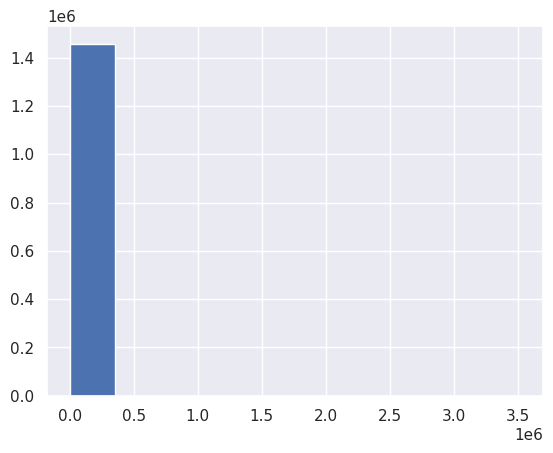

In [273]:
plt.hist(df.trip_duration)
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В исходном наборе данных есть большой разброс значение целевой переменной.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSE имеет размерность абсолютной ошибки, RMSLE - относительной. Авторы выбрали RMSLE чтобы снизить влияние абсолютных значений, и снизить влияние возможных выбросов.

Мы изучили несколько вариантов линейной регрессии в sklearn, но все они минимизировали среднеквадратичную ошибку (MSE), а не среднеквадратичную логарифмическую ошибку (RMSLE). Для работы с RMSLE мы можем использовать следующий подход: вместо прямого предсказания целевой переменной, мы будем предсказывать ее логарифм. Пусть $\hat{y}_i = \log{(y_i + 1)}$ будет модифицированной целевой переменной, а $\hat{a}(x_i)$ — предсказание модели, обученной на $\hat{y}_i$. Чтобы получить исходное предсказание, мы используем обратное преобразование: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.


Это преобразование позволяет нам оптимизировать MSE для логарифмированных значений, что эквивалентно оптимизации RMSLE для исходных значений. Это связано с тем, что минимизация квадратичной ошибки между логарифмами прогнозов и реальных значений соответствует минимизации логарифмической ошибки между самими прогнозами и реальными значениями ***(для дополнительного балла можете доказать почему)***. Таким образом, этот подход позволяет использовать стандартные методы линейной регрессии для задач, где требуется минимизировать RMSLE.


$$\hat{y}_i = \log{(y_i + 1)}$$
$$a(x_i) = \exp(\hat{a}(x_i)) - 1 => \hat{a}(x_i) = \log(a(x_i) + 1)$$
$$\text{MSE}(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}- \hat{a} \big)^2 = 
\frac{1}{\ell}\sum_{i=1}^{\ell} \big[ \log{(y_i + 1) - \log(a(x_i) + 1)}\big]^2 =
\text{RMSLE}(X, y, a) ^2$$

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

***(Какая константа прекрасно оптимизирует RMSLE MSE (с преобразованиями?))***

In [274]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean(np.power(log1p_y_pred - log1p_y_true, 2)))

y = np.log1p(df['trip_duration'])
rmsle_best_const = rmsle(y, np.full(len(df), y.mean()))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4) # ответ конечно же нельзя подсматривать

0.7957592365411509


In [275]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df = df.drop('trip_duration', axis=1)

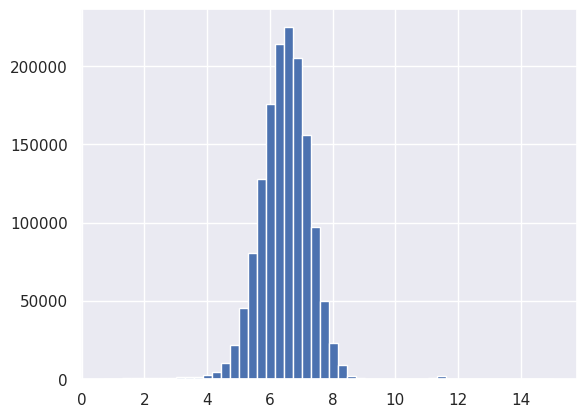

In [276]:
plt.hist(df['log_trip_duration'], bins=50);

## Часть 1. Изучаем `pickup_datetime` & Обучаем модель [+1 балл]


**Задание 2 [+0.125 балла]**. Для начала давайте проанализируем общее количество поездок по дням. Построим график, отражающий зависимость числа поездок от конкретного дня в году (например, можно использовать `sns.countplot`).

Просмотр этой информации важен по нескольким причинам:

1. **Выявление закономерностей**: Анализ количества поездок по дням может помочь выявить определенные закономерности или тренды, например, повышенный спрос в выходные дни или праздничные периоды.

2. **Обнаружение аномалий**: График может помочь идентифицировать дни с необычно высоким или низким количеством поездок, что может указывать на наличие аномалий или особых событий.

3. **Корректировка моделей**: Если анализ показывает, что спрос сильно колеблется в зависимости от дня, это может потребовать учета этого фактора в моделях прогнозирования.

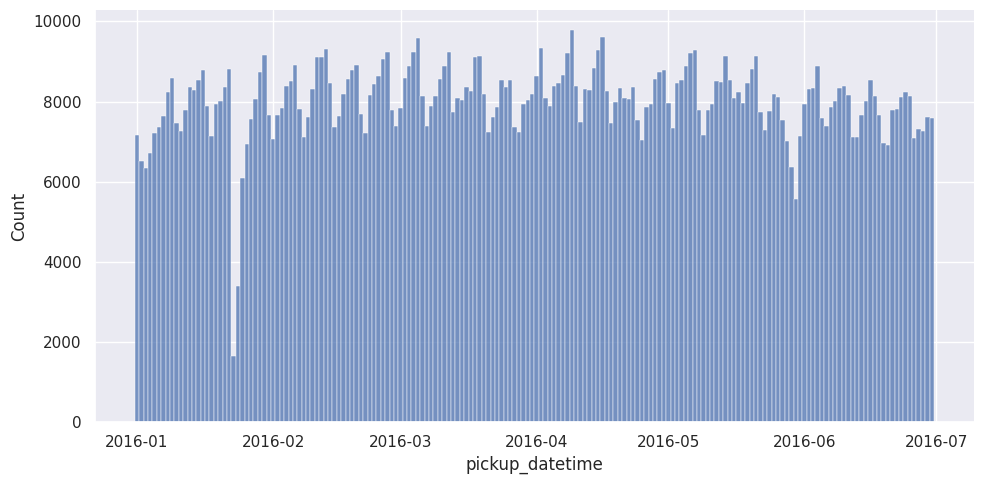

In [277]:
sns.displot(df['pickup_datetime'].dt.date, aspect=2);

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [278]:
df['pickup_datetime'].dt.date.value_counts()[-7:]

pickup_datetime
2016-01-02    6512
2016-05-29    6372
2016-01-03    6353
2016-01-25    6084
2016-05-30    5570
2016-01-24    3383
2016-01-23    1648
Name: count, dtype: int64

Два периода с аномально маленькими количествами поездок - это 23 и 24 января 2016 года. В эти дни в Нью-Йорке был снегопад. Второй период: 30 мая 2016 года - это был день поминовения.

Зависимость количества поездок от дня недели:

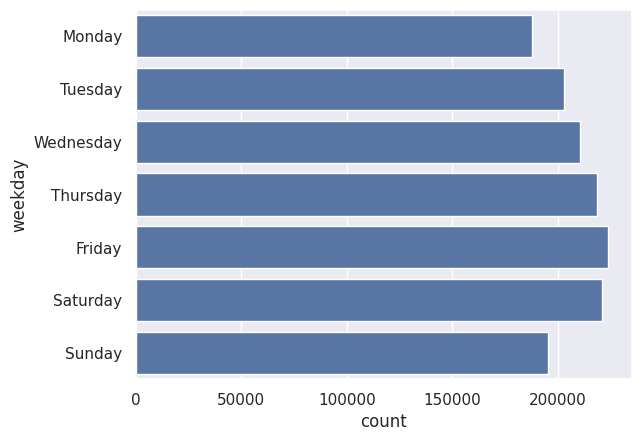

In [279]:
df['weekday'] = df.pickup_datetime.dt.day_name()
sns.countplot(df['weekday'], order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]);

Зависимость количества поездок от часов в сутках:

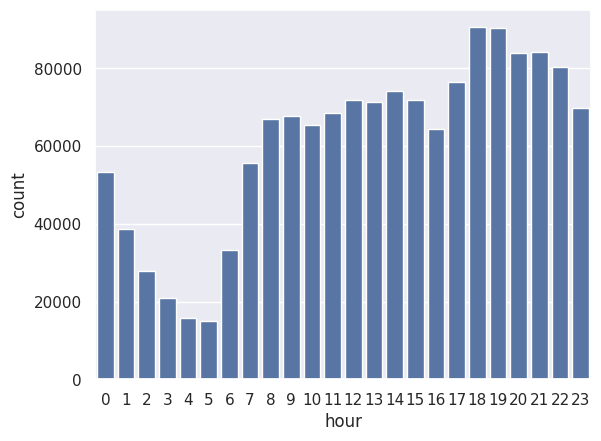

In [281]:
df['hour'] = df.pickup_datetime.dt.hour
sns.countplot(x=df['hour']);

**Задание 3 [+0.25 балла]**. Постройте график, на котором будет отображена зависимость числа поездок от времени суток для различных месяцев. Используйте разные цвета для кривых, соответствующих разным месяцам, с помощью параметра `hue` в `sns.relplot`. Аналогичным образом постройте график, показывающий зависимость количества поездок от часа в сутках для разных дней недели.

Это важно по нескольким причинам:

1. **Выявление временных закономерностей**: Графики помогут увидеть, как спрос на поездки меняется в течение суток в разные месяцы и дни недели. Это может выявить определенные тренды, например, пиковые часы поездок или временные периоды с низким спросом.

2. **Адаптация к сезонности и недельным циклам**: Понимание того, как спрос на поездки меняется в зависимости от времени года и дня недели, позволяет адаптировать модель машинного обучения и сделать правильный feature-engineering (правильную предобработку данных)




In [283]:
df['month'] = df.pickup_datetime.dt.month_name()

Число поездок от времени суток для различных месяцев:

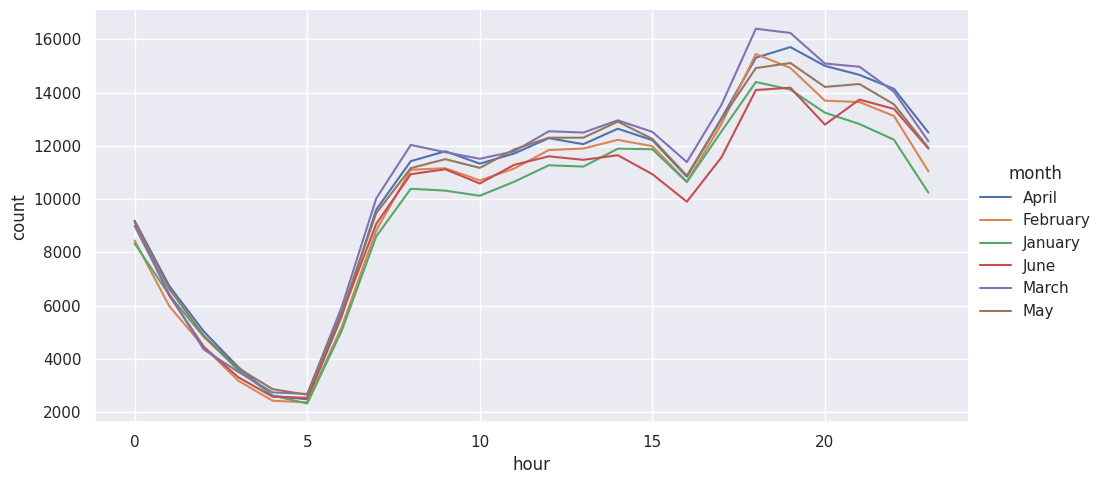

In [284]:
c1 = df.groupby(['hour', 'month']).count().rename(columns={'vendor_id': 'count'})
c1 = c1.reset_index()
g = sns.relplot(data=c1, x=c1.hour, y=c1['count'], hue='month', aspect=2, kind='line')

Число поездок от времени суток для различных дней недели:

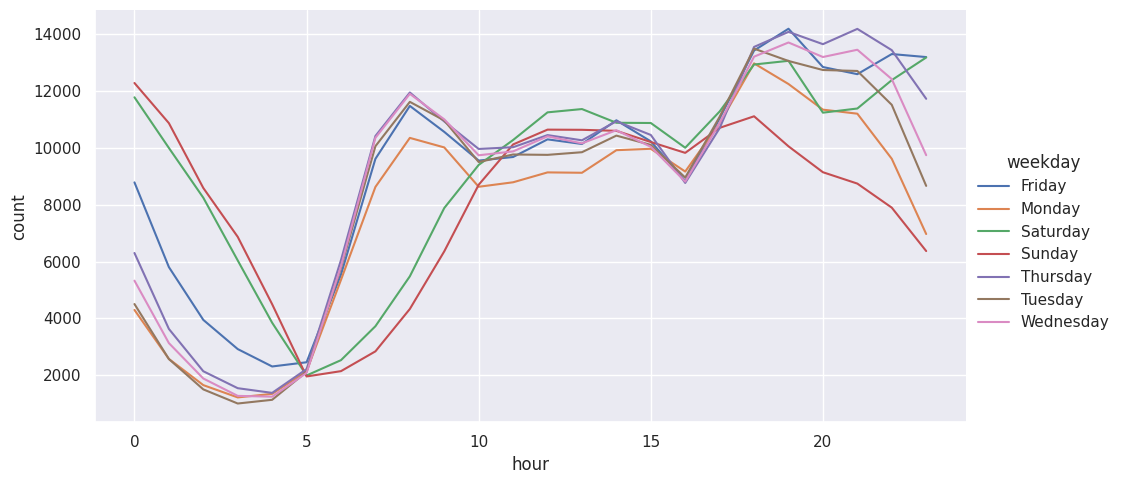

In [285]:
c1 = df.groupby(['hour', 'weekday']).count().rename(columns={'vendor_id': 'count'})
c1 = c1.reset_index()
sns.relplot(data=c1, x=c1.hour, y=c1['count'], hue='weekday', aspect=2, kind='line');

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это может быть связано?

Число поездок растет с 6:00 до 8:00 (люди едут на работу) и с 17:00 до 19:00 (люди едут с работы). В воскресенье меньше поездок по сравнению с другими днями недели, что логично.

**Задание 4 [+0.25 балла]**. Разделите данные на обучающую и тестовую выборки в соотношении 80:20 с помощью функции `train_test_split` из библиотеки `sklearn`. На основе обучающей выборки постройте график, показывающий зависимость логарифма среднего времени поездки от дня недели. Повторите этот процесс для часа в сутках и дня в году.

Посмотреть график распределения тренировочной выборки важно по нескольким причинам:

1. **Понимание данных**: Анализ тренировочной выборки помогает лучше понять распределение и характеристики данных, что важно для выбора и настройки моделей машинного обучения

2. **Выявление закономерностей**: Графики зависимостей могут выявить важные закономерности и тренды в данных, которые могут быть использованы для улучшения моделей прогнозирования.

3. **Избежание переобучения**: Анализируя только тренировочную выборку, мы избегаем риска "заглядывания в будущее" и переобучения модели, когда она слишком хорошо подгоняется под тестовые данные.


In [258]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  log_trip_duration    weekday  hour    month  
0                  N           6.122493     Monday    17    March  
1                  N           6.498282     Sunday     0     June  
2                  N           7.661527    Tuesday    11  January  
3                  N           6.063785  Wednesday    19    April  
4                  N           6.077642   Saturday    13    March

In [289]:
df['day_of_year'] = df.pickup_datetime.dt.dayofyear

In [303]:
y = df['log_trip_duration']
x = df.drop(columns=['log_trip_duration'])

In [304]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [305]:
df1 = pd.DataFrame(x_train[['weekday', 'hour', 'month', 'day_of_year']])
df1['log_trip_duration'] = y_train

In [306]:
df1.head()

weekday  hour    month  day_of_year  log_trip_duration
958881     Sunday    21      May          143           5.420535
768380     Friday     8    March           71           6.672033
1361623  Thursday    18    March           84           5.703782
1118381  Saturday     8  January           16           6.115892
1023326  Thursday    13      May          140           6.674561

Логарифм среднего времени поездки от дня недели

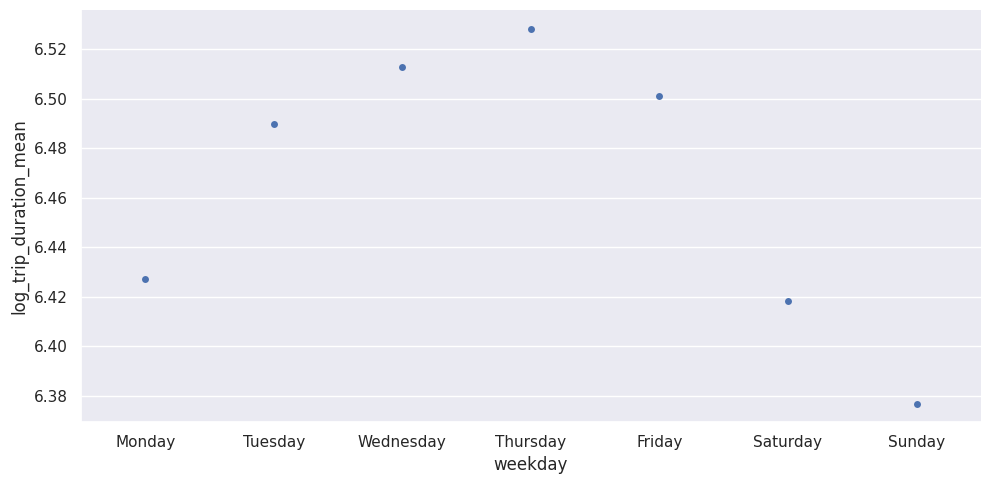

In [307]:
a1 = df1.groupby(['weekday']).agg({'log_trip_duration': 'mean'}).rename(columns={'log_trip_duration': 'log_trip_duration_mean'}).reset_index()
sns.catplot(x=a1.weekday, y=a1.log_trip_duration_mean, aspect=2,\
           order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]);

Логарифм среднего времени поездки от часа в сутках

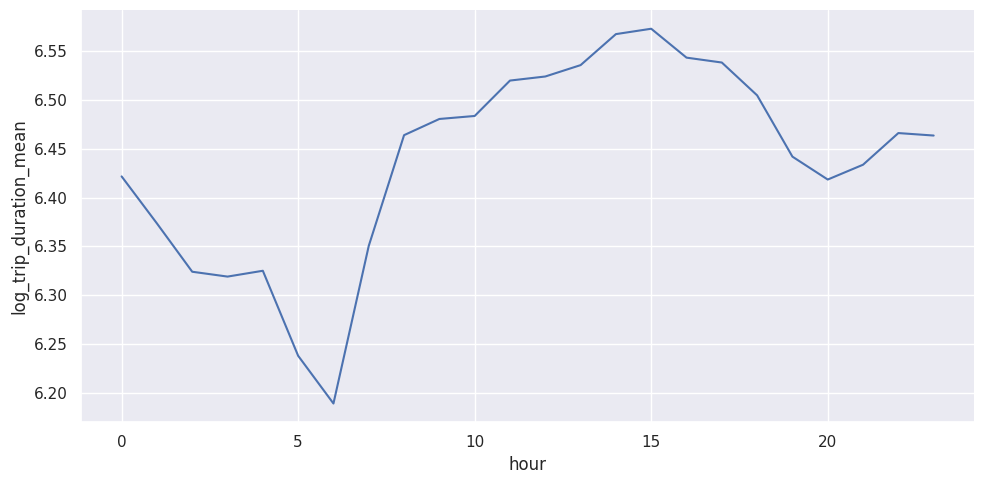

In [308]:
a1 = df1.groupby(['hour']).agg({'log_trip_duration': 'mean'}).rename(columns={'log_trip_duration': 'log_trip_duration_mean'}).reset_index()
sns.relplot(x=a1.hour, y=a1.log_trip_duration_mean, aspect=2, kind='line');

Логарифм среднего времени поездки от дня в году

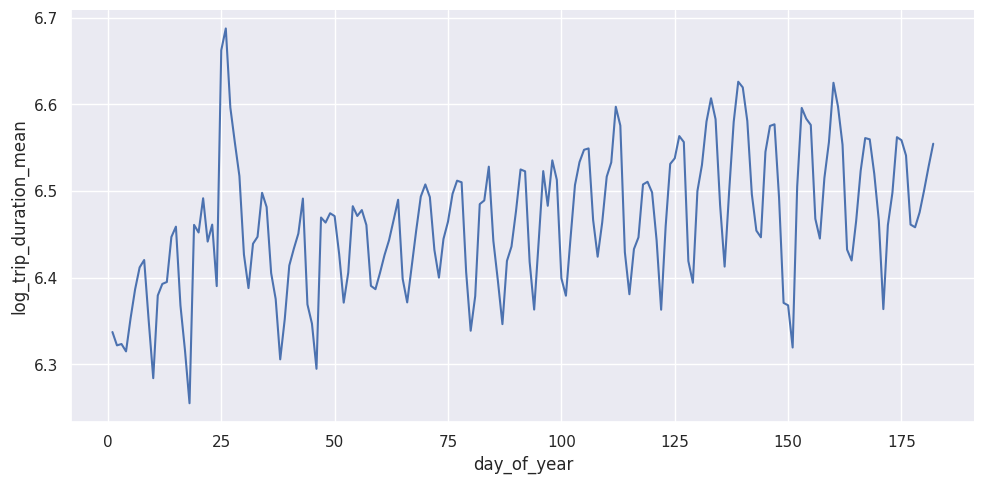

In [309]:
a1 = df1.groupby(['day_of_year']).agg({'log_trip_duration': 'mean'}).rename(columns={'log_trip_duration': 'log_trip_duration_mean'}).reset_index()
sns.relplot(x=a1.day_of_year, y=a1.log_trip_duration_mean, aspect=2, kind='line');

Добавьте следующие признаки на основе `pickup_datetime` (не зря мы преобразовывали это в первых этапах):
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Разбиение даты на отдельные признаки важно по нескольким причинам:

1. **Выявление временных закономерностей**: Разделение даты на день недели, месяц и час помогает выявить закономерности в данных, связанные с временем суток, днями недели и сезонностью.

2. **Улучшение прогностической способности модели**: Добавление этих признаков может улучшить точность моделей машинного обучения, поскольку они могут захватывать важные временные зависимости в данных.

3. **Адаптация к аномальным событиям**: Бинарные признаки, указывающие на аномальные периоды, позволяют модели учитывать особые ситуации, которые могут существенно отличаться от обычных условий.

4. **Повышение интерпретируемости**: Разбиение даты на отдельные компоненты делает модель более интерпретируемой, позволяя легче понять, как различные временные факторы влияют на целевую переменную.

In [310]:
x_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
958881   id0475000          2 2016-05-22 21:23:41                1   
768380   id1698494          2 2016-03-11 08:56:07                5   
1361623  id1306673          2 2016-03-24 18:34:41                1   
1118381  id2267317          2 2016-01-16 08:09:55                1   
1023326  id2049779          1 2016-05-19 13:09:14                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
958881         -73.957153        40.762032         -73.952599   
768380         -73.981461        40.743946         -73.987823   
1361623        -73.981392        40.768650         -73.974007   
1118381        -73.990837        40.756088         -73.978020   
1023326        -73.974739        40.759254         -73.982750   

         dropoff_latitude store_and_fwd_flag   weekday  hour    month  \
958881          40.772099                  N    Sunday    21      May   
768380          40.753952                  N    Friday     8    March   
1361623         40.784081                  N  Thursday    18    March   
1118381         40.749168                  N  Saturday     8  January   
1023326         40.769085                  N  Thursday    13      May   

         day_of_year  
958881           143  
768380            71  
1361623           84  
1118381           16  
1023326          140

In [312]:
tm1 = pd.Timestamp(year=2016, month=1, day=23)
tm2 = pd.Timestamp(year=2016, month=1, day=24)
tm3 = pd.Timestamp(year=2016, month=5, day=30)
x_train['date'] = x_train['pickup_datetime'].dt.date
condition = ((x_train.date == tm1.date()) | (x_train.date == tm2.date()) | (x_train.date == tm3.date))
x_train['period'] = np.where(condition, 1, 0)

x_test['date'] = x_test['pickup_datetime'].dt.date
condition = ((x_test.date == tm1.date()) | (x_test.date == tm2.date()) | (x_test.date == tm3.date))
x_test['period'] = np.where(condition, 1, 0)

In [313]:
x_test[x_test['period'] == 1].head()

id  vendor_id     pickup_datetime  passenger_count  \
112342   id2631171          2 2016-01-23 00:09:14                1   
1079876  id3425694          1 2016-01-23 06:27:57                1   
143259   id0978644          2 2016-01-24 18:11:40                1   
1250613  id1883546          2 2016-01-23 00:41:50                3   
1375116  id0704947          1 2016-01-24 21:07:26                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
112342         -74.006615        40.731712         -73.991890   
1079876        -73.983315        40.769047         -73.974190   
143259         -73.862900        40.769321         -73.977783   
1250613        -73.987610        40.760166         -73.960678   
1375116        -73.968765        40.677677         -73.969528   

         dropoff_latitude store_and_fwd_flag   weekday  hour    month  \
112342          40.727161                  N  Saturday     0  January   
1079876         40.785656                  N  Saturday     6  January   
143259          40.726028                  N    Sunday    18  January   
1250613         40.769684                  N  Saturday     0  January   
1375116         40.691673                  N    Sunday    21  January   

         day_of_year        date  period  
112342            23  2016-01-23       1  
1079876           23  2016-01-23       1  
143259            24  2016-01-24       1  
1250613           23  2016-01-23       1  
1375116           24  2016-01-24       1

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Задание 5 [+0.375 балла]**.
Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

Применение `OneHotEncoder` и `StandardScaler` важно по следующим причинам:

1. **OneHotEncoder для категориальных признаков**: Категориальные признаки необходимо преобразовать в числовой формат перед использованием в линейной регрессии. `OneHotEncoder` преобразует категориальные переменные в бинарные векторы, что позволяет модели корректно интерпретировать эти признаки без внесения искажений, связанных с порядком значений.

2. **StandardScaler для численных признаков**: Масштабирование численных признаков с помощью `StandardScaler` помогает стандартизировать данные, приводя их к одному масштабу с нулевым средним и единичным стандартным отклонением. Это улучшает интерпретацию весов линейной модели (а также мы обсудим на лекции, почему это ускоряет обучение модели)


В данной задаче как категориальные признаки будем рассматривать weekday, month, period. Данные признаки относятся к категориальным, т.к. они принимают значения из некоторого ограниченного множества. В качестве численных признаков будем рассматривать hour, day_of_year.

In [315]:
x_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
958881   id0475000          2 2016-05-22 21:23:41                1   
768380   id1698494          2 2016-03-11 08:56:07                5   
1361623  id1306673          2 2016-03-24 18:34:41                1   
1118381  id2267317          2 2016-01-16 08:09:55                1   
1023326  id2049779          1 2016-05-19 13:09:14                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
958881         -73.957153        40.762032         -73.952599   
768380         -73.981461        40.743946         -73.987823   
1361623        -73.981392        40.768650         -73.974007   
1118381        -73.990837        40.756088         -73.978020   
1023326        -73.974739        40.759254         -73.982750   

         dropoff_latitude store_and_fwd_flag   weekday  hour    month  \
958881          40.772099                  N    Sunday    21      May   
768380          40.753952                  N    Friday     8    March   
1361623         40.784081                  N  Thursday    18    March   
1118381         40.749168                  N  Saturday     8  January   
1023326         40.769085                  N  Thursday    13      May   

         day_of_year        date  period  
958881           143  2016-05-22       0  
768380            71  2016-03-11       0  
1361623           84  2016-03-24       0  
1118381           16  2016-01-16       0  
1023326          140  2016-05-19       0

Численные и категориальные признаки:

In [316]:
numerical = ['hour', 'day_of_year']
categorical = ['weekday', 'month', 'period']

In [317]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

transformer = ColumnTransformer([('oneHotEncoder', OneHotEncoder(), categorical),\
                                ('scaler', StandardScaler(), numerical)])
pipeline = Pipeline([('oneHotEncoder_scaler', transformer), ('ridge', Ridge())])

model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])

print("RMSLE: {:.5f}".format(root_mean_squared_error(y_test, y_pred)))

RMSLE: 0.79116


## Часть 2. Изучаем координаты & Обучаем модель [+1.5 балла]




Теперь, когда мы подробно изучили временные аспекты данных о поездках, давайте переключим наше внимание на географические данные, а именно на координаты начала и конца поездок. Мы предоставили вам функцию, которая отображает на карте точки начала или конца поездок. Однако обратите внимание, что для эффективности этой функции мы используем только небольшой фрагмент данных, иначе обработка займет слишком много времени.

Анализ координат важен по нескольким причинам:

1. **Пространственный анализ**: Координаты позволяют проводить пространственный анализ, который может выявить географические закономерности в данных, такие как популярные места отправления и назначения, районы с высоким спросом и т. д.

2. **Улучшение точности прогнозов**: Включение географических признаков в модели прогнозирования может повысить их точность, поскольку координаты могут быть связаны с различными факторами, влияющими на длительность поездок и спрос на транспортные услуги.

In [318]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    Рисует карту с кругами, представляющими точки данных.

    Параметры
    ----------
    data : DataFrame
        DataFrame, содержащий колонки с широтой и долготой.
    latitude_column : str
        Название колонки в DataFrame, содержащей координаты широты.
    longitude_column : str
        Название колонки в DataFrame, содержащей координаты долготы.
    color : str
        Цвет кругов, которые будут нарисованы на карте.

    Возвращает
    -------
    folium.Map
        Объект карты Folium с нарисованными кругами в указанных координатах.

    Примеры
    --------
    >>> import pandas as pd
    >>> data = pd.DataFrame({
    ...     'latitude': [37.773972, 37.774159],
    ...     'longitude': [-122.431297, -122.431297]
    ... })
    >>> show_circles_on_map(data, 'latitude', 'longitude', 'blue')
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [319]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [320]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

От основной массы выделяются поездки в аэропорты KJFK, KLGA & KEWR.

**Задание 6 [+0.375 балла]**. Как нам хорошо известно, время поездки $t$ связано с расстоянием $s$ и средней скоростью $v_{\text{ср}}$ соотношением $t = s / v_{\text{ср}}$. Из этого следует, что расстояние между начальной и конечной точками поездки является одним из ключевых факторов, влияющих на время поездки. Хотя мы не можем точно определить полный маршрут, который преодолеет такси, мы можем оценить это расстояние, рассчитав кратчайшее расстояние между точками начала и конца поездки. Для корректного вычисления расстояния между двумя точками на поверхности Земли можно использовать функцию `haversine`. Рассчитайте кратчайшее расстояние для каждого объекта в данных и сохраните его в колонку `haversine`.

Это важно по нескольким причинам:

1. **Улучшение точности модели**: Включение расстояния как признака в модель может значительно улучшить точность прогнозирования времени поездки, поскольку оно напрямую влияет на длительность поездки.

2. **Понимание взаимосвязей**: Анализ зависимости времени поездки от расстояния может помочь выявить взаимосвязи и закономерности в данных, что полезно для понимания динамики транспортных потоков.


In [321]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # радиус Земли в км
    return c * r

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [326]:
x_train['log_haversine'] = np.log1p(\
    haversine(x_train.pickup_latitude, x_train.pickup_longitude,\
              x_train.dropoff_latitude, x_train.dropoff_longitude))
x_test['log_haversine'] = np.log1p(\
    haversine(x_test.pickup_latitude, x_test.pickup_longitude,\
              x_test.dropoff_latitude, x_test.dropoff_longitude))

x_train['haversine'] = haversine(x_train.pickup_latitude, x_train.pickup_longitude,\
                                 x_train.dropoff_latitude, x_train.dropoff_longitude)
x_test['haversine'] = haversine(x_test.pickup_latitude, x_test.pickup_longitude,\
                                    x_test.dropoff_latitude, x_test.dropoff_longitude)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [327]:
your_df = pd.concat([x_train, y_train], axis=1)
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 [+0.375 балла]**. Давайте проанализируем среднюю скорость движения такси. Для каждого объекта в обучающей выборке вычислите среднюю скорость, разделив значение в колонке `haversine` на значение в колонке `trip_duration`. Затем постройте гистограмму распределения полученных значений средней скорости.


In [328]:
x_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
958881   id0475000          2 2016-05-22 21:23:41                1   
768380   id1698494          2 2016-03-11 08:56:07                5   
1361623  id1306673          2 2016-03-24 18:34:41                1   
1118381  id2267317          2 2016-01-16 08:09:55                1   
1023326  id2049779          1 2016-05-19 13:09:14                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
958881         -73.957153        40.762032         -73.952599   
768380         -73.981461        40.743946         -73.987823   
1361623        -73.981392        40.768650         -73.974007   
1118381        -73.990837        40.756088         -73.978020   
1023326        -73.974739        40.759254         -73.982750   

         dropoff_latitude store_and_fwd_flag   weekday  hour    month  \
958881          40.772099                  N    Sunday    21      May   
768380          40.753952                  N    Friday     8    March   
1361623         40.784081                  N  Thursday    18    March   
1118381         40.749168                  N  Saturday     8  January   
1023326         40.769085                  N  Thursday    13      May   

         day_of_year        date  period  log_haversine  haversine  
958881           143  2016-05-22       0       0.780835   1.183295  
768380            71  2016-03-11       0       0.804237   1.234991  
1361623           84  2016-03-24       0       1.038511   1.825006  
1118381           16  2016-01-16       0       0.844061   1.325792  
1023326          140  2016-05-19       0       0.826165   1.284541

In [329]:
x_train['velocity'] = x_train['haversine'] / y_train

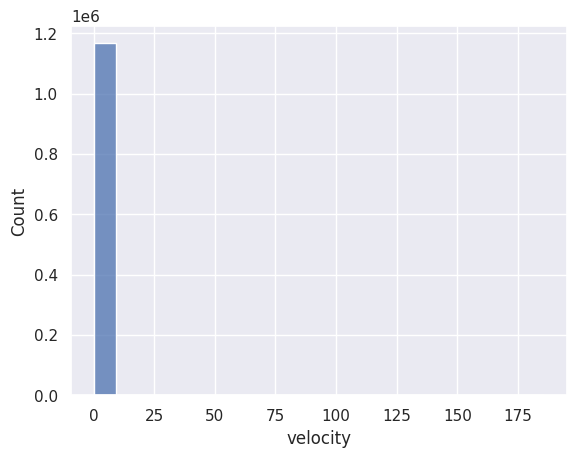

In [331]:
sns.histplot(x_train['velocity'], bins=20);

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

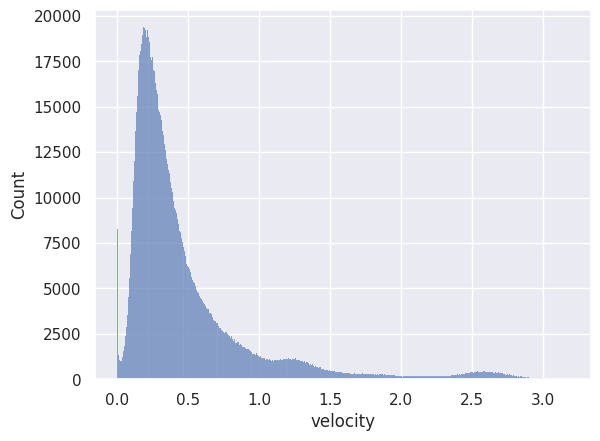

In [332]:
a1 = x_train[x_train['velocity'] < np.percentile(x_train['velocity'], 99.9)]
sns.histplot(a1['velocity']);

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Потому, что значение скорости мы посчитали, используя целевую переменную - значение времени поездки, которое нужно предсказывать. 

In [335]:
x_train.drop('velocity', inplace = True, axis=1)

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 8 [+0.625 балла]**. Сейчас мы практически не используем прямые значения координат в анализе. Это связано с тем, что широта и долгота по отдельности не несут значимой информации, а их взаимосвязь с целевой переменной нелинейна. Чтобы эффективно интегрировать координаты в наш анализ, мы можем применить следующий подход: окружим область с наибольшим количеством поездок прямоугольником и разделим этот прямоугольник на ячейки. Каждой точке присвоим номер ячейки, в которой она находится, а точкам вне прямоугольника присвоим значение -1.

Создайте трансформер, который вначале делит указанную область на ячейки, а затем генерирует два признака: номер ячейки начала поездки и номер ячейки конца поездки. Выбор количества строк и столбцов оставьте на ваше усмотрение.

Важно, чтобы все вычисления были векторизованными, трансформер не изменял исходный набор данных, а все необходимые статистики вычислялись только по обучающей выборке в методе `fit`.

Этот подход важен по следующим причинам:

1. **Учет пространственной структуры**: Разбиение на ячейки позволяет учесть пространственную структуру данных, что может улучшить качество анализа и прогнозирования.

2. **Снижение размерности**: Преобразование координат в номера ячеек уменьшает размерность данных, что упрощает анализ и сокращает время вычислений.

3. **Улучшение интерпретируемости**: Номера ячеек могут быть более интерпретируемыми, чем сырые координаты, что облегчает понимание взаимосвязей в данных.

4. **Адаптация к нелинейным зависимостям**: Такой подход позволяет адаптироваться к нелинейным зависимостям между координатами и целевой переменной, что может повысить точность моделей.

In [336]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    """
    Трансформер для преобразования географических координат в номера ячеек сетки.

    Параметры
    ----------
    n_rows : int
        Количество строк сетки.
    n_cols : int
        Количество столбцов сетки.
    lat_min : float
        Минимальная широта области.
    lat_max : float
        Максимальная широта области.
    lon_min : float
        Минимальная долгота области.
    lon_max : float
        Максимальная долгота области.

    Атрибуты
    ----------
    cell_size_lat : float
        Размер ячейки сетки по широте.
    cell_size_lon : float
        Размер ячейки сетки по долготе.

    Методы
    -------
    fit(X, y=None)
        Находит параметры сетки на основе данных.
    transform(X)
        Преобразует координаты в номера ячеек сетки.
    show_map()
        Отображает карту с ячейками сетки.
    """

    def __init__(self, n_rows, n_cols, lat_min, lat_max, lon_min, lon_max):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_min = lat_min
        self.lat_max = lat_max
        self.lon_min = lon_min
        self.lon_max = lon_max

        lat = 0.5 * (self.lat_min + self.lat_max)
        lon = 0.5 * (self.lon_min + self.lon_max)
        self.m = folium.Map(location=(lat, lon), zoom_start=12)
        self.delta_lat = abs(self.lat_min - self.lat_max) / self.n_rows
        self.delta_lon = abs(self.lon_min - self.lon_max) / self.n_cols

    def fit(self, X=None, y=None):
        """
        Находит параметры сетки на основе данных.

        Параметры
        ----------
        X : array-like, shape [n_samples, 2]
            Входные данные с координатами (широта, долгота).
        y : Ignored
            Не используется, существует для совместимости со стандартами sklearn.

        Возвращает
        -------
        self : object
            Возвращает себя.
        """
        # ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
        return self

    def transform(self, x):
        """
        Преобразует координаты в номера ячеек сетки.

        Параметры
        ----------
        X : array-like, shape [n_samples, 2]
            Входные данные с координатами (широта, долгота).

        Возвращает
        -------
        X_transformed : array, shape [n_samples, 2]
            Преобразованные данные с номерами ячеек (номер строки, номер столбца).
        """
        (row_pickup, col_pickup) = self.get_number(x['pickup_latitude'], x['pickup_longitude'])
        x['pickup_num'] = self.n_cols * (row_pickup - 1) + col_pickup

        (row_dropoff, col_dropoff) = self.get_number(x['dropoff_latitude'], x['dropoff_longitude'])
        x['dropoff_num'] = self.n_cols * (row_dropoff - 1) + col_dropoff

        return x

    def show_map(self, x,\
                 lat=('pickup_latitude', 'dropoff_latitude'),\
                 lon=('pickup_longitude', 'dropoff_longitude')):
        """
        Отображает карту с ячейками сетки.
        """
        rec = folium.Rectangle(bounds=[(self.lat_min, self.lon_min), (self.lat_max, self.lon_max)])
        rec.add_to(self.m)

        for item in range(self.n_rows):
            loc = [
                [self.lat_min + self.delta_lat * item, self.lon_min],
                [self.lat_min + self.delta_lat * item, self.lon_max]
            ]
            pol = folium.PolyLine(locations=loc)
            pol.add_to(self.m)
        for item in range(self.n_cols):
            loc = [
                [self.lat_min, self.lon_min + self.delta_lon * item],
                [self.lat_max, self.lon_min + self.delta_lon * item]
            ]
            pol = folium.PolyLine(locations=loc)
            pol.add_to(self.m)

        for _, row in x.iterrows():
            circle0 = folium.Circle(radius=100, location=(row[lat[0]], row[lon[0]]),\
                                    color='red', fill_color='red', fill=True)
            circle1 = folium.Circle(radius=100, location=(row[lat[1]], row[lon[1]]),\
                                    color='red', fill_color='red', fill=True)
            circle0.add_to(self.m)
            circle1.add_to(self.m)

        return self.m
    
    
    def get_number(self, lat, lon):
        """
        Возвращает номер строки, номер столбца.
        Нумерация из левого нижнего квадрата
        """
        width = haversine(self.lat_min, self.lon_min, self.lat_min, self.lon_max) / self.n_cols
        height = haversine(self.lat_min, self.lon_min, self.lat_max, self.lon_min) / self.n_rows
        w_lon = haversine(self.lat_min, self.lon_min, self.lat_min, lon)
        h_lat = haversine(self.lat_min, self.lon_min, lat, self.lon_min)

        return h_lat // height + 1, w_lon // width + 1

In [337]:
mgt = MapGridTransformer(5, 3, 40.700, 40.825, -74.025, -73.925)
pipe = Pipeline(steps=[('MapGridTransformer', mgt)])
pipe.fit_transform(df);
mgt.show_map(df.sample(1000))

**Задание 9 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [344]:
x_train['pickup_num'] = df['pickup_num']
x_train['dropoff_num'] = df['dropoff_num']
x_test['pickup_num'] = df['pickup_num']
x_test['dropoff_num'] = df['dropoff_num']

In [346]:
x_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
958881   id0475000          2 2016-05-22 21:23:41                1   
768380   id1698494          2 2016-03-11 08:56:07                5   
1361623  id1306673          2 2016-03-24 18:34:41                1   
1118381  id2267317          2 2016-01-16 08:09:55                1   
1023326  id2049779          1 2016-05-19 13:09:14                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
958881         -73.957153        40.762032         -73.952599   
768380         -73.981461        40.743946         -73.987823   
1361623        -73.981392        40.768650         -73.974007   
1118381        -73.990837        40.756088         -73.978020   
1023326        -73.974739        40.759254         -73.982750   

         dropoff_latitude store_and_fwd_flag   weekday  hour    month  \
958881          40.772099                  N    Sunday    21      May   
768380          40.753952                  N    Friday     8    March   
1361623         40.784081                  N  Thursday    18    March   
1118381         40.749168                  N  Saturday     8  January   
1023326         40.769085                  N  Thursday    13      May   

         day_of_year        date  period  log_haversine  haversine  \
958881           143  2016-05-22       0       0.780835   1.183295   
768380            71  2016-03-11       0       0.804237   1.234991   
1361623           84  2016-03-24       0       1.038511   1.825006   
1118381           16  2016-01-16       0       0.844061   1.325792   
1023326          140  2016-05-19       0       0.826165   1.284541   

         pickup_num  dropoff_num  
958881          9.0          9.0  
768380          5.0          8.0  
1361623         8.0         11.0  
1118381         8.0          5.0  
1023326         8.0          8.0

In [347]:
numerical = ['hour', 'day_of_year', 'log_haversine']
categorical = ['weekday', 'month', 'period', 'pickup_num', 'dropoff_num']


transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                 ('scaling', StandardScaler(), numerical)])

pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Ridge())])

model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])
print(f'RMSE: {root_mean_squared_error(y_test, y_pred) :.5f}')

RMSE: 0.50189


## Часть 3. Изучаем оставшиеся признаки & Обучаем модель [+0.5 балла]


**Задание 10 [+0.375 балла]**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [352]:
df[['vendor_id', 'passenger_count', 'store_and_fwd_flag']].nunique()

vendor_id              2
passenger_count       10
store_and_fwd_flag     2
dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

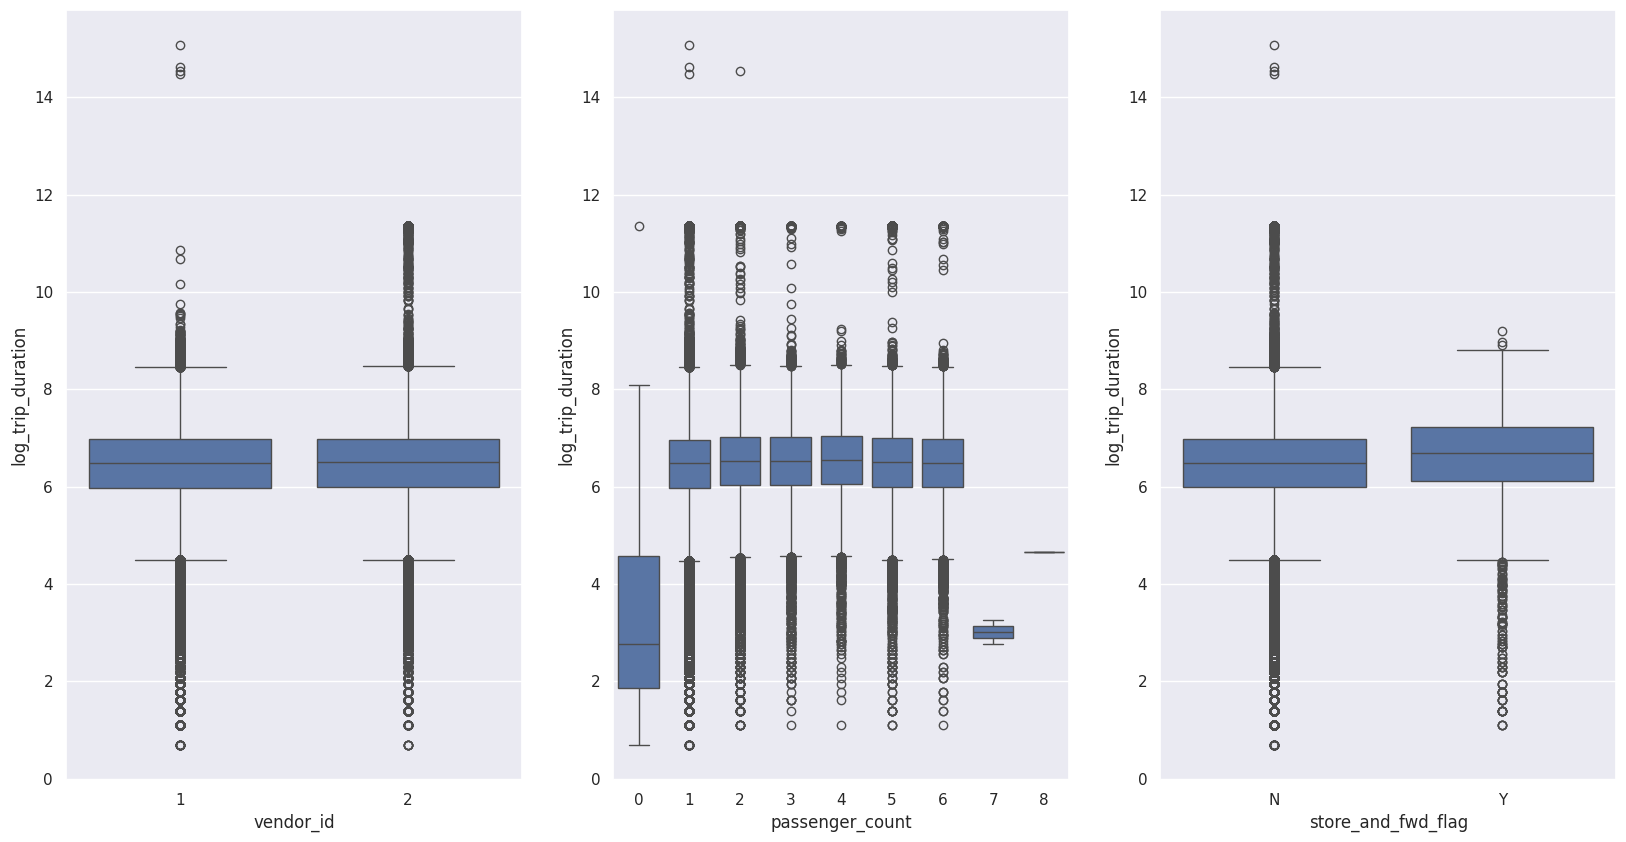

In [355]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20, 10))
sns.boxplot(y=y_train, x=x_train['vendor_id'], ax=ax[0])
sns.boxplot(y=y_train, x=x_train['passenger_count'], ax=ax[1])
sns.boxplot(y=y_train, x=x_train['store_and_fwd_flag'], ax=ax[2])

plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
pd.set_option('future.no_silent_downcasting', True)

df['vendor_id'] = df['vendor_id'].replace({2:0})
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'N':0,'Y':1})

In [359]:
x_train['vendor_id'] = df['vendor_id']
x_test['vendor_id'] = df['vendor_id']
x_train['store_and_fwd_flag'] = df['store_and_fwd_flag']
x_test['store_and_fwd_flag'] = df['store_and_fwd_flag']

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Думаю, что нет, так как при одинаковых значениях признака, значения целевой переменной равны.

**Задание 11 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [361]:
categorical = ['vendor_id', 'store_and_fwd_flag']
numerical = ['passenger_count']

transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                 ('scaling', StandardScaler(), numerical)])

pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Ridge())])

model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])
print(f'RMSE: {root_mean_squared_error(y_test, y_pred) :.5f}')

RMSE: 0.79397


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель [+1.5 балла]

**Задание 12 [+0.5 балла]**. В нашем наборе данных присутствуют аномальные записи: объекты с необычно коротким временем поездки, слишком большим пройденным расстоянием или с большими остатками после регрессии. В этом задании предлагается исключить такие объекты из обучающего набора. Для этого постройте гистограммы распределения указанных величин, определите объекты, которые можно считать выбросами, и очистите __обучающий набор__ от них.

Следует отметить, что, несмотря на то что эти объекты кажутся выбросами, в тестовом наборе данных также могут присутствовать объекты с аналогичными аномальными значениями. Поэтому удаление выбросов из обучающего набора может привести к ухудшению качества на тестовом наборе. Однако, в целом, рекомендуется удалять выбросы из обучающего набора, чтобы получить более разумную и интерпретируемую модель.

Для определения выбросов можно использовать различные методы, такие как:

- **Z-оценка**: Выбросы определяются как объекты, у которых абсолютное значение Z-оценки (стандартизированное значение) превышает определенный порог (например, 3).

- **IQR (межквартильный размах)**: Выбросы определяются как объекты, значения которых выходят за пределы [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], где Q1 и Q3 — первый и третий квартили соответственно.


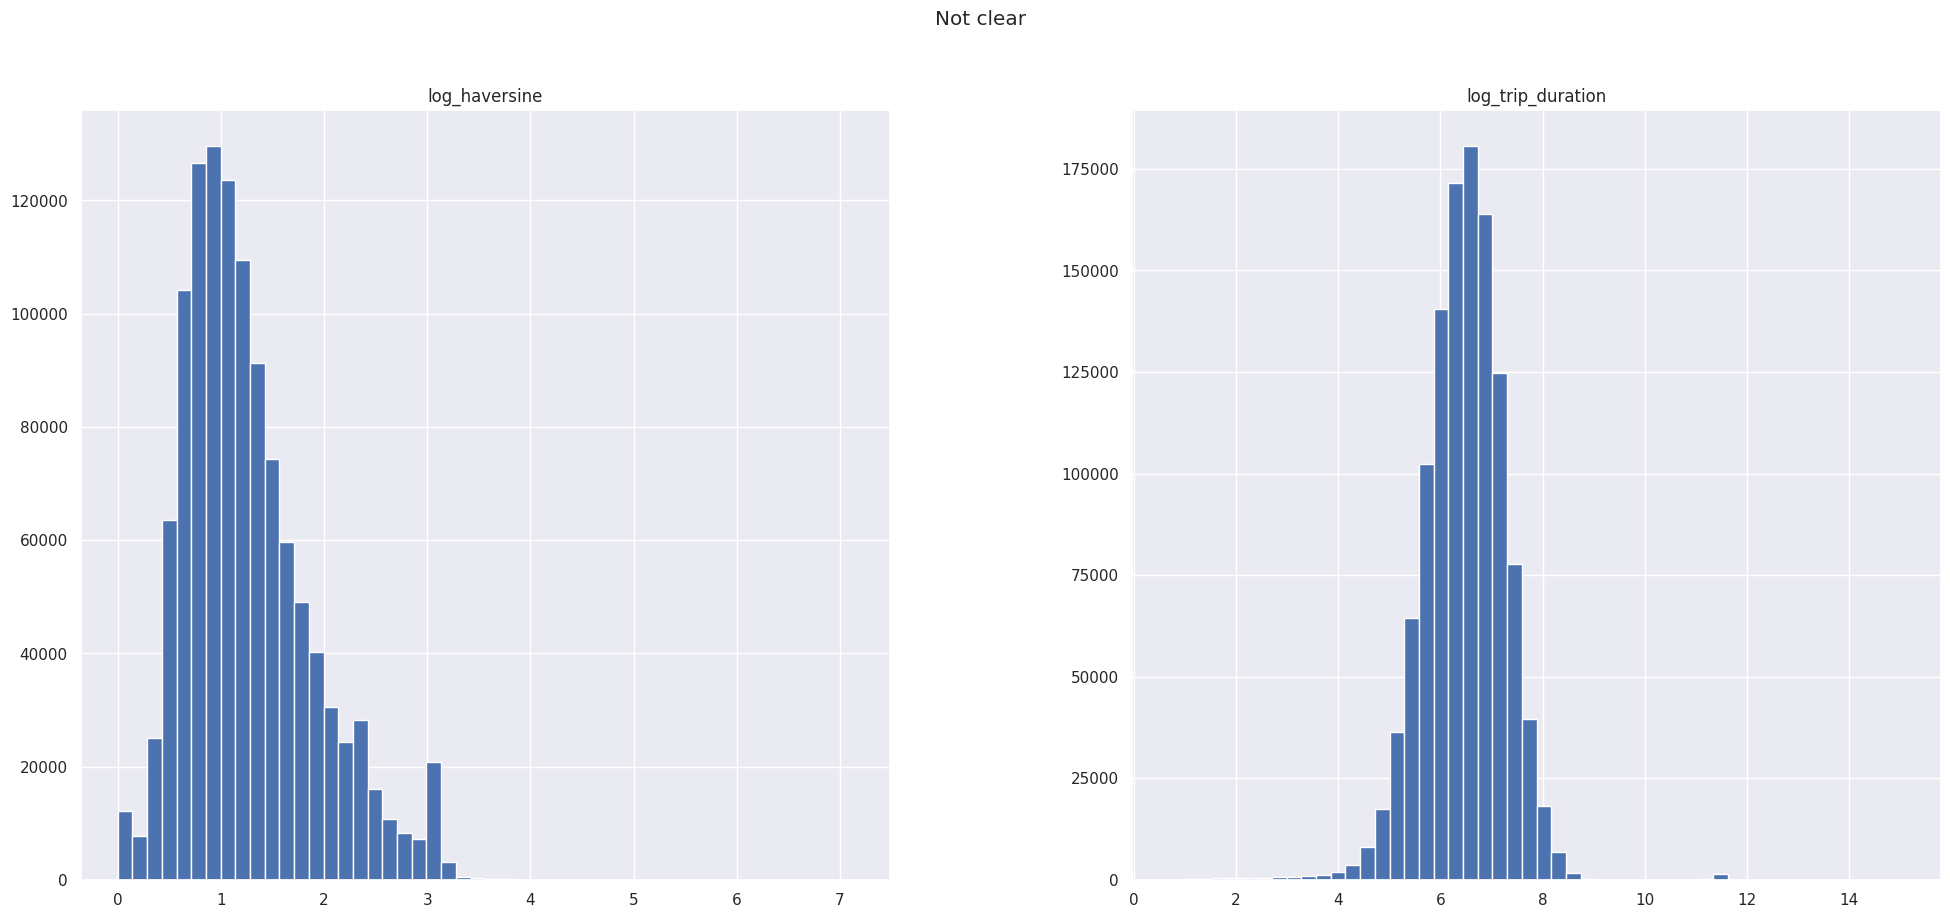

In [362]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))
x_train.hist('log_haversine', bins=50, ax=ax[0])
y_train.hist(bins=50, ax=ax[1])
ax[1].set_title('log_trip_duration')
fig.suptitle('Not clear')

plt.show()

In [427]:
from scipy import stats

df_train = pd.concat([x_train, y_train], axis=1)
z_score = np.abs(stats.zscore(df_train[['log_haversine', 'log_trip_duration']]))
df_train_clear = df_train[(z_score < 3).all(axis=1)]

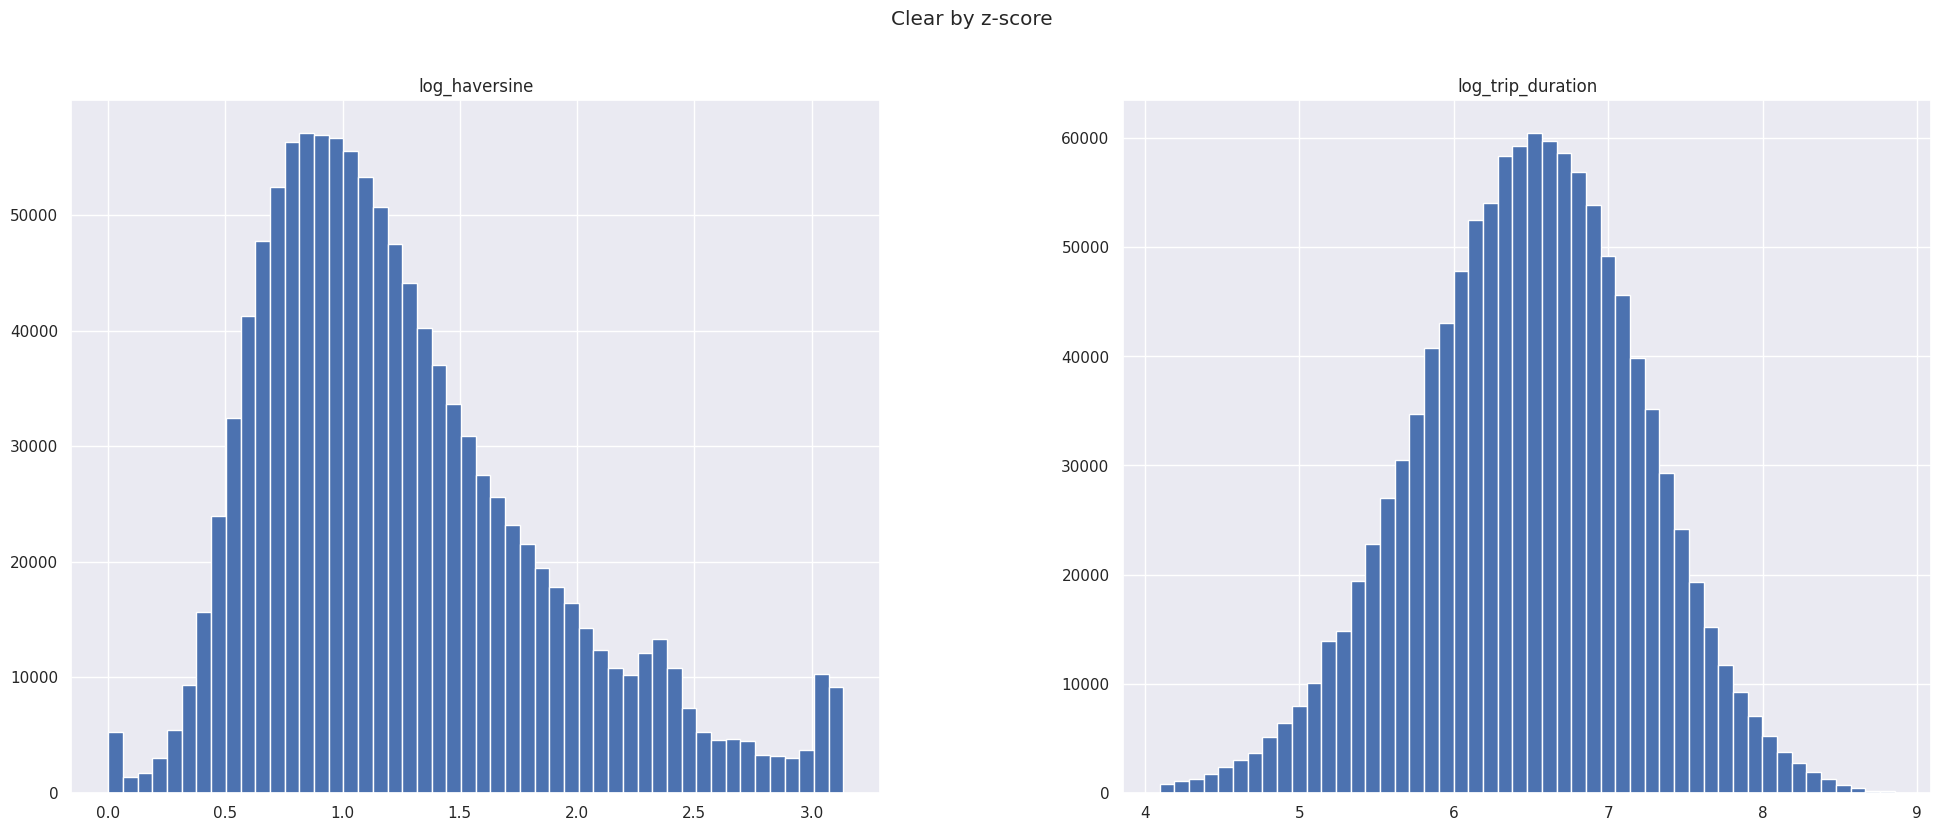

In [428]:
fig, ax = plt.subplots(1, 2, figsize=(24, 9))
df_train_clear.hist('log_haversine', bins=50, ax=ax[0])
df_train_clear.hist('log_trip_duration', bins=50, ax=ax[1])
fig.suptitle('Clear by z-score')

plt.show()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [429]:
df_train_clear.sample()

id  vendor_id     pickup_datetime  passenger_count  \
1033893  id1531885          0 2016-04-23 23:02:48                5   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1033893        -73.982994        40.765186         -73.957489   

         dropoff_latitude store_and_fwd_flag   weekday  hour  month  \
1033893         40.718273                  0  Saturday    23  April   

         day_of_year        date  period  log_haversine  haversine  \
1033893          114  2016-04-23       0       1.893371   5.641722   

         pickup_num  dropoff_num  log_trip_duration  
1033893         8.0          3.0           7.583756

In [430]:
df_train_clear.shape

(1154175, 20)

In [431]:
categorical = ['vendor_id', 'store_and_fwd_flag', 'weekday', 'month', 'period', 'pickup_num', 'dropoff_num']
numerical = ['passenger_count', 'hour', 'day_of_year', 'log_haversine']

Удаляем из датасета точки, которые находятся вне секторов старта, и конца поездки:

In [432]:
sector_num_filter = (df_train_clear['pickup_num'] <= 15) & (df_train_clear['dropoff_num'] <= 15)
df_train_clear = df_train_clear.loc[pickup_filter]

In [433]:
df_train_clear.shape

(1134664, 20)

Определяем редкие категории:

In [483]:
def get_percent(feature, df=df_train_clear):
    counts = df[feature].value_counts().reset_index()
    counts['percent'] = counts['count'] * 100 / df.shape[0]
    return counts

In [484]:
for feature in categorical:
    res = get_percent(feature)
    print('-' * 80)
    print(res)
    print('-' * 80)

--------------------------------------------------------------------------------
   vendor_id   count    percent
0          0  606830  53.481031
1          1  527834  46.518969
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
   store_and_fwd_flag    count    percent
0                   0  1128490  99.455874
1                   1     6174   0.544126
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
     weekday   count    percent
0     Friday  174128  15.346217
1   Saturday  171857  15.146070
2   Thursday  170165  14.996951
3  Wednesday  163723  14.429205
4    Tuesday  158275  13.949063
5     Sunday  150719  13.283139
6     Monday  145797  12.849355
--------------------------------------------------------------------------------
------------------------------------

In [481]:
mgt.show_map(df_train_clear.sample(1000)) # нумерация из левого нижнего сектора

Видно, что признаки 'store_and_fwd_flag' & 'period' можно исключить из рассмотрения: категориальные признаки с двумя значениями, одно из которых очень редко. И для признаков 'pickup_num' & 'dropoff_num' объеденим номера секторов посадки и высадки пассажира: (10, 13, 14, 15) и (2, 3, 6, 9).

In [485]:
df_train_clear.head()

id  vendor_id     pickup_datetime  passenger_count  \
958881   id0475000          0 2016-05-22 21:23:41                1   
768380   id1698494          0 2016-03-11 08:56:07                5   
1361623  id1306673          0 2016-03-24 18:34:41                1   
1118381  id2267317          0 2016-01-16 08:09:55                1   
1023326  id2049779          1 2016-05-19 13:09:14                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
958881         -73.957153        40.762032         -73.952599   
768380         -73.981461        40.743946         -73.987823   
1361623        -73.981392        40.768650         -73.974007   
1118381        -73.990837        40.756088         -73.978020   
1023326        -73.974739        40.759254         -73.982750   

         dropoff_latitude store_and_fwd_flag   weekday  hour    month  \
958881          40.772099                  0    Sunday    21      May   
768380          40.753952                  0    Friday     8    March   
1361623         40.784081                  0  Thursday    18    March   
1118381         40.749168                  0  Saturday     8  January   
1023326         40.769085                  0  Thursday    13      May   

         day_of_year        date  period  log_haversine  haversine  \
958881           143  2016-05-22       0       0.780835   1.183295   
768380            71  2016-03-11       0       0.804237   1.234991   
1361623           84  2016-03-24       0       1.038511   1.825006   
1118381           16  2016-01-16       0       0.844061   1.325792   
1023326          140  2016-05-19       0       0.826165   1.284541   

         pickup_num  dropoff_num  log_trip_duration  
958881          9.0          9.0           5.420535  
768380          5.0          8.0           6.672033  
1361623         8.0         11.0           5.703782  
1118381         8.0          5.0           6.115892  
1023326         8.0          8.0           6.674561

In [495]:
df_train_clear.loc[df_train_clear['pickup_num'].isin([10, 13, 14, 15]), 'pickup_num'] = 10
df_train_clear.loc[df_train_clear['dropoff_num'].isin([10, 13, 14, 15]), 'dropoff_num'] = 10
df_train_clear.loc[df_train_clear['pickup_num'].isin([2, 3, 6, 9]), 'pickup_num'] = 2
df_train_clear.loc[df_train_clear['dropoff_num'].isin([2, 3, 6, 9]), 'dropoff_num'] = 2

In [498]:
get_percent('pickup_num')

pickup_num   count    percent
0         8.0  357162  31.477336
1         5.0  174943  15.418044
2         4.0  154043  13.576089
3        11.0  121269  10.687657
4         1.0   88808   7.826810
5         2.0   84415   7.439647
6        12.0   59702   5.261646
7         7.0   52472   4.624453
8        10.0   41850   3.688317

In [497]:
get_percent('dropoff_num')

dropoff_num   count    percent
0          8.0  334631  29.491638
1          5.0  165797  14.611991
2          4.0  138358  12.193742
3          2.0  117711  10.374084
4         11.0  109517   9.651932
5          1.0   89817   7.915735
6         12.0   70506   6.213822
7          7.0   55759   4.914142
8         10.0   52568   4.632913

Обучите регрессию `Ridge` с и|tandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы сделали до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [499]:
categorical = ['vendor_id', 'weekday', 'month', 'pickup_num', 'dropoff_num']
numerical = ['passenger_count', 'hour', 'day_of_year', 'log_haversine']

In [511]:
x_train = df_train_clear[categorical + numerical]
y_train = df_train_clear['log_trip_duration']

In [541]:
transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                 ('scaling', StandardScaler(), numerical)])

pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Ridge())])

model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])
print(f'RMSE ridge regression: {root_mean_squared_error(y_test, y_pred) :.5f}')

RMSE ridge regression: 0.50973


In [518]:
x_train.head()

vendor_id   weekday    month  pickup_num  dropoff_num  \
958881           0    Sunday      May         2.0          2.0   
768380           0    Friday    March         5.0          8.0   
1361623          0  Thursday    March         8.0         11.0   
1118381          0  Saturday  January         8.0          5.0   
1023326          1  Thursday      May         8.0          8.0   

         passenger_count  hour  day_of_year  log_haversine  
958881                 1    21          143       0.780835  
768380                 5     8           71       0.804237  
1361623                1    18           84       1.038511  
1118381                1     8           16       0.844061  
1023326                1    13          140       0.826165

**Задание 13 [+0.5 балла]**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [520]:
print(f'Количество до кодирования: {x_train.shape[1]}')
print(f'Количество после кодирования: {transformer.transform(x_train).shape[1]}')

Количество до кодирования: 9
Количество после кодирования: 37


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [542]:
from sklearn.linear_model import Lasso

transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                 ('scaling', StandardScaler(), numerical)])

pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Lasso())])

model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])
print(f'RMSE lasso regression: {root_mean_squared_error(y_test, y_pred) :.5f}')

RMSE lasso regression: 0.79435


По тренировочной выборке с помощью кросс-валидации (`zGridSearchCV`) подберите оптимальные значения параметра регуляризации (alpha, lambda в разных литературах по-разному) для `Ridge` и `Lasso` на тестовой выборке измерьте качество лучшей полученной модели.

In [546]:
from sklearn.model_selection import GridSearchCV


transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                 ('scaling', StandardScaler(), numerical)])

pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Ridge())])

alphas = np.logspace(-2, 3, 20)
grid = GridSearchCV(pipeline, [{"regression__alpha": alphas}],
                    scoring="neg_root_mean_squared_error", n_jobs=-1)
grid.fit(x_train, y_train)
alpha_best_ridge = grid.best_params_["regression__alpha"]

print(f'Best alpha Ridge regression: {alpha_best_ridge :.5f}')

Best alpha Ridge regression: 14.38450


In [548]:
pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Ridge(alpha_best_ridge))])
model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])

print(f'RMSE Ridge regression with best alpha: {root_mean_squared_error(y_test, y_pred) :.5f}')

RMSE Ridge regression with best alpha: 0.50973


In [551]:
pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Lasso())])

alphas = np.logspace(-2, 3, 20)
grid = GridSearchCV(pipeline, [{"regression__alpha": alphas}],
                    scoring="neg_root_mean_squared_error", n_jobs=-1)
grid.fit(x_train, y_train)
alpha_best_lasso = grid.best_params_["regression__alpha"]

print(f'Best alpha Lasso regression: {alpha_best_lasso :.5f}')

Best alpha Lasso regression: 0.01000


In [552]:
pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Lasso(alpha_best_lasso))])
model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])

print(f'RMSE Lasso regression with best alpha: {root_mean_squared_error(y_test, y_pred) :.5f}')

RMSE Lasso regression with best alpha: 0.51898


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 14 [+0.5 балла]**. Использование взаимодействия признаков часто оказывается полезным для улучшения качества модели. Мы уже разделили карту Манхэттена на ячейки и создали признаки, указывающие на ячейку начала и окончания поездки.

Теперь предлагается пойти дальше и посчитать, как часто встречается каждая возможная пара этих признаков в нашем наборе данных. Затем выберем 100 самых частых пар и закодируем поездки с этими парами как категориальный признак, а для остальных объектов установим значение -1. Таким образом, мы сможем кодировать информацию о маршруте поездки такси.

Создание таких признаков может быть круто по нескольким причинам:

1. **Улучшение предсказаний**: Комбинация начальной и конечной точек поездки может содержать важную информацию о времени поездки, которая поможет улучшить предсказательную способность модели.

2. **Выявление популярных маршрутов**: Анализ самых частых пар ячеек может помочь выявить наиболее популярные маршруты, что может быть полезно для планирования транспортных услуг.

3. **Интерпретируемость**: Новые признаки, основанные на маршрутах, могут улучшить интерпретируемость модели, позволяя лучше понять, как различные маршруты влияют на время поездки.

4. **Адаптация к специфике данных**: Такой подход позволяет адаптировать модель к специфике данных о поездках такси, учитывая географическую структуру города и особенности движения.

Также вы можете придумать другие способы создания признаков, связанных с маршрутом, которые могут дать дополнительные баллы при сдаче этого домашнего задания


In [720]:
x_train.head()

vendor_id   weekday    month  pickup_num  dropoff_num  \
958881           0    Sunday      May         2.0          2.0   
768380           0    Friday    March         5.0          8.0   
1361623          0  Thursday    March         8.0         11.0   
1118381          0  Saturday  January         8.0          5.0   
1023326          1  Thursday      May         8.0          8.0   

         passenger_count  hour  day_of_year  log_haversine  
958881                 1    21          143       0.780835  
768380                 5     8           71       0.804237  
1361623                1    18           84       1.038511  
1118381                1     8           16       0.844061  
1023326                1    13          140       0.826165

In [722]:
top = x_train.value_counts(['pickup_num', 'dropoff_num']).reset_index()
top.shape

(81, 3)

Всего получилась 81 возможная пара. Выберем 10 наиболее частых пар для кодирования:

In [723]:
top.loc[0:9, 'route'] = np.arange(0, 10)
top.fillna(-1, inplace=True)
top.drop('count', inplace=True, axis=1)
top.head()

pickup_num  dropoff_num  route
0         8.0          8.0    0.0
1         8.0          5.0    1.0
2         5.0          8.0    2.0
3         5.0          5.0    3.0
4         8.0         11.0    4.0

In [729]:
x_train = x_train.merge(top, how='left', left_on=['pickup_num', 'dropoff_num'], right_on=['pickup_num', 'dropoff_num'])

In [734]:
x_test = x_test.merge(top, how='left', left_on=['pickup_num', 'dropoff_num'], right_on=['pickup_num', 'dropoff_num'])

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Такой признак потенциально полезный, так как он характеризует "популярность" маршрута, то есть насколько часто совершаются поездки по определенному пути. Линейная модель учитывает начало и конец поездки, как отдельные независимые признаки, и их "комбинация" исключена по определению.

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [739]:
x_train.head()

vendor_id   weekday    month  pickup_num  dropoff_num  passenger_count  \
0          0    Sunday      May         2.0          2.0                1   
1          0    Friday    March         5.0          8.0                5   
2          0  Thursday    March         8.0         11.0                1   
3          0  Saturday  January         8.0          5.0                1   
4          1  Thursday      May         8.0          8.0                1   

   hour  day_of_year  log_haversine  route  
0    21          143       0.780835   -1.0  
1     8           71       0.804237    2.0  
2    18           84       1.038511    4.0  
3     8           16       0.844061    1.0  
4    13          140       0.826165    0.0

In [748]:
categorical = ['vendor_id', 'weekday', 'month', 'pickup_num', 'dropoff_num', 'route']
numerical = ['passenger_count', 'hour', 'day_of_year', 'log_haversine']

In [749]:
transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                 ('scaling', StandardScaler(), numerical)])

pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Ridge())])

model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])
print(f'RMSE Ridge regression: {root_mean_squared_error(y_test, y_pred) :.5f}')

RMSE Ridge regression: 0.50478


In [750]:
transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
                                 ('scaling', StandardScaler(), numerical)])

pipeline = Pipeline(steps=[('transform', transformer),
                           ('regression', Lasso())])

model = pipeline.fit(x_train[numerical + categorical], y_train)
y_pred = model.predict(x_test[numerical + categorical])
print(f'RMSE Lasso regression: {root_mean_squared_error(y_test, y_pred) :.5f}')

RMSE Lasso regression: 0.79435
